In [26]:
#import necessary librarys to work with
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

print("All libraries imported successfully!")

All libraries imported successfully!


# Logistic Regression: Breast Cancer Classification
This project uses Scikit-learn's Logistic Regression to classify breast tumors as malignant or benign using the UCI Breast Cancer Wisconsin Dataset.

## Data Loading and Exploration
Load the UCI Breast Cancer Wisconsin Dataset and inspect its structure to understand the features and target variable.

In [27]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Display basic information
print("Dataset Shape:", X.shape)
print("\nFeature Names:\n", X.columns.tolist())
print("\nTarget Distribution:\n", y.value_counts())
print("\nFirst 5 Rows of Features:\n", X.head())

Dataset Shape: (569, 30)

Feature Names:
 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

Target Distribution:
 target
1    357
0    212
Name: count, dtype: int64

First 5 Rows of Features:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     120

## Data Preprocessing
Standardize the numerical features using StandardScaler to ensure all features contribute equally to the Logistic Regression model.

In [29]:
# Initialize scaler
scaler = StandardScaler()

# Scale features
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # Convert back to DataFrame

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Verify shapes
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (455, 30)
Testing Features Shape: (114, 30)
Training Target Shape: (455,)
Testing Target Shape: (114,)


## Initial Visualization
Visualize the distribution of key features for malignant and benign classes to explore their predictive power.

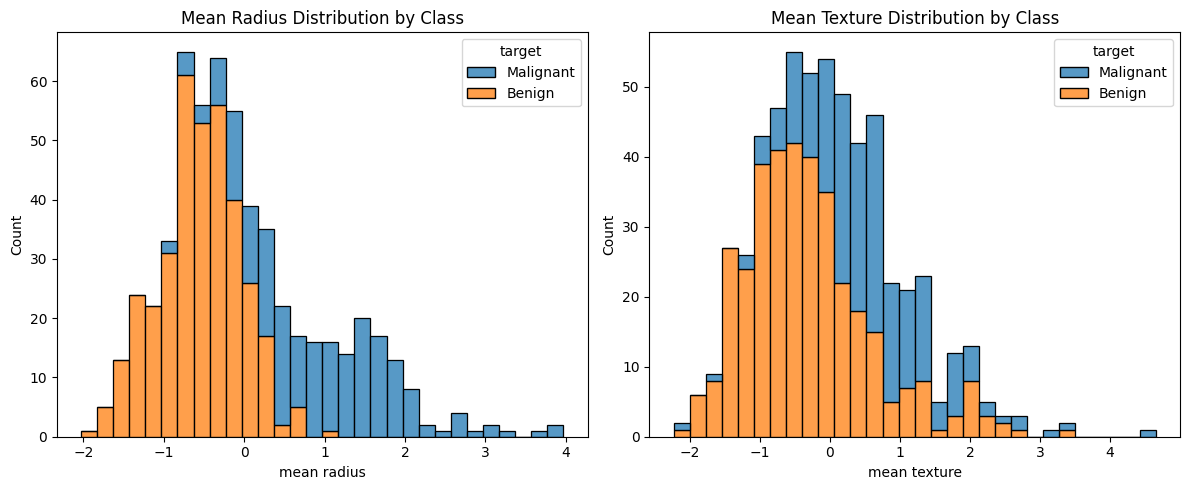

In [30]:
# Combine features and target for visualization
data_viz = X_scaled.copy()
data_viz['target'] = y.map({0: 'Malignant', 1: 'Benign'})

# Plot histograms for mean radius and mean texture
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=data_viz, x='mean radius', hue='target', multiple='stack', bins=30)
plt.title('Mean Radius Distribution by Class')

plt.subplot(1, 2, 2)
sns.histplot(data=data_viz, x='mean texture', hue='target', multiple='stack', bins=30)
plt.title('Mean Texture Distribution by Class')

plt.tight_layout()
plt.show()

## Model Training
Train a Logistic Regression model on the training data and predict classes for the test set.

In [31]:
# Initialize Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print sample predictions
print("Sample Test Predictions (first 10):", y_pred[:10])
print("Actual Test Labels (first 10):", y_test.values[:10])

Sample Test Predictions (first 10): [0 1 0 1 0 1 1 0 0 0]
Actual Test Labels (first 10): [0 1 0 1 0 1 1 0 0 0]
